<a href="https://colab.research.google.com/github/Marceline37/securit-/blob/main/Calssification_d'attaque_DDoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyses des différentes attaques DDoS** 

---
*-	Apache2*
*-	Back*
*-	Land*
*-	Neptune*
*-	Mailbomb*
*-	Pod*
*-	Srocesstable*
*-	Smurf*
*-	Teardrop*
*-	Udpstorm*
*-	Worm*



# 1 Librairies

In [221]:
#!pip install scikit-plot

In [222]:
# Import et traitement des données
import pandas as pd
import numpy as np

# Graphiques
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

# Machine learning - Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Machine learning - Modèle d'apprentissage supervisé
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Machine learning - Modèle selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Machine learning - Métriques d'erreur
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot.metrics as splt

# 2 Explorations et analyses des données

In [115]:
test = 'https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTest%2B.txt'
train ='https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTrain%2B.txt'

df1 = pd.read_csv(train)
te_df = pd.read_csv(test)

In [116]:
# Mise en place des noms de colonnnes sur les deux dataframes
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df1.columns = columns
te_df.columns = columns

In [117]:
df = pd.concat([te_df,df1])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.00,neptune,20


In [118]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [59]:
#les informations du jeu du données 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


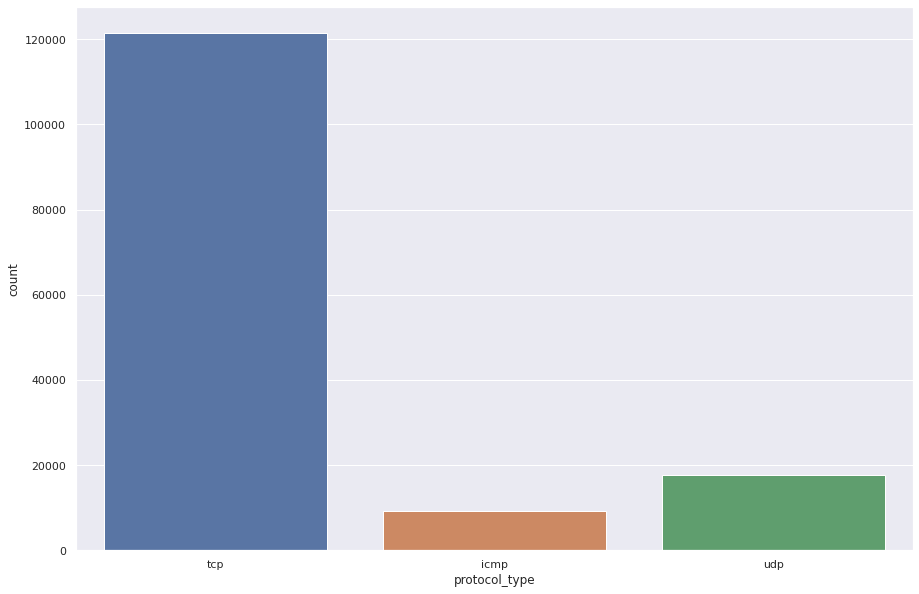

In [60]:
#Analyse de la colonne 'protocol_type'
plt.figure(figsize=(15,10))
sns.countplot(df['protocol_type'])
plt.xticks()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


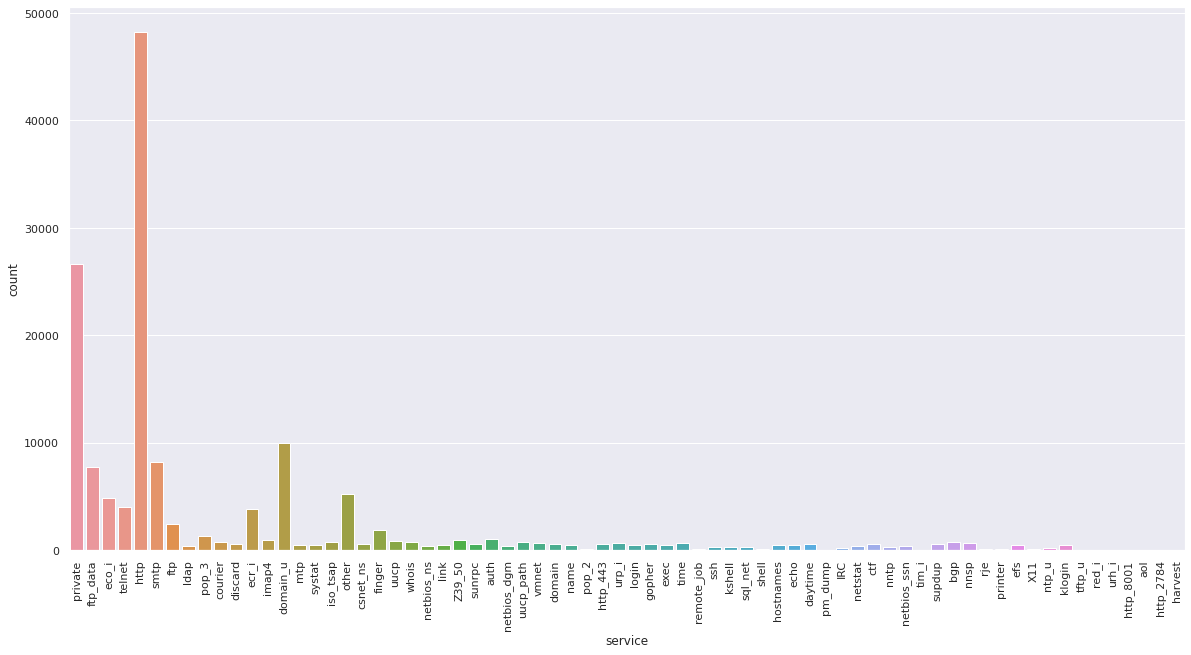

In [61]:
# Analyse de la colonne 'service'
plt.figure(figsize=(20,10))
sns.countplot(df['service'])
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


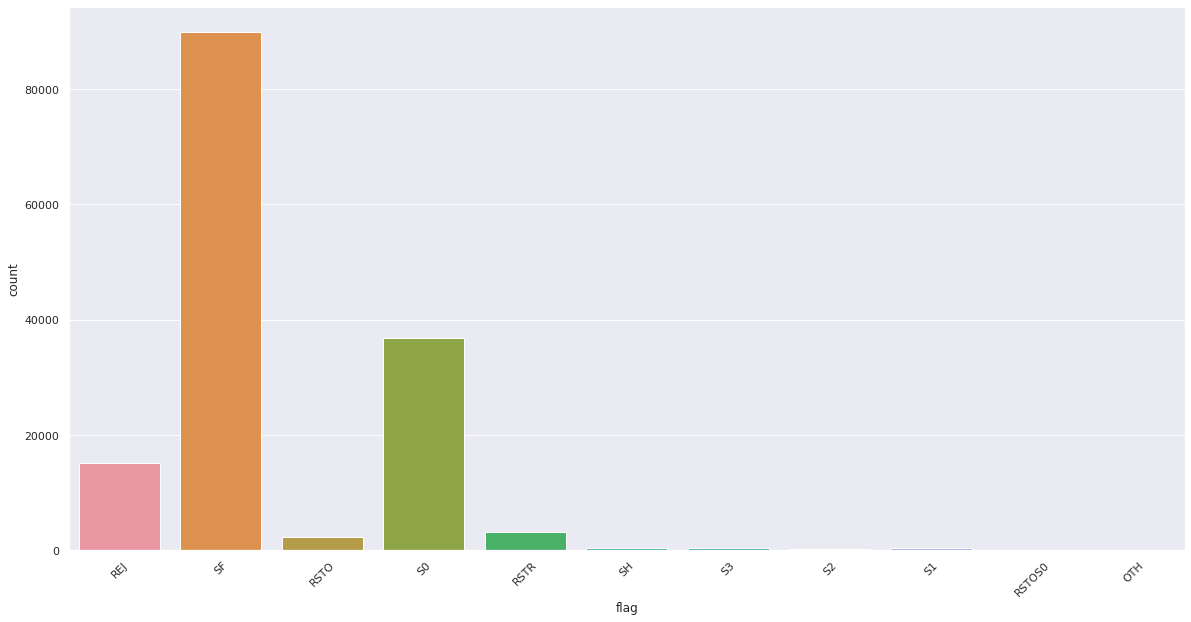

In [62]:
# Analyse de la colonne 'flag'
plt.figure(figsize=(20,10))
sns.countplot(df['flag'])
plt.xticks(rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


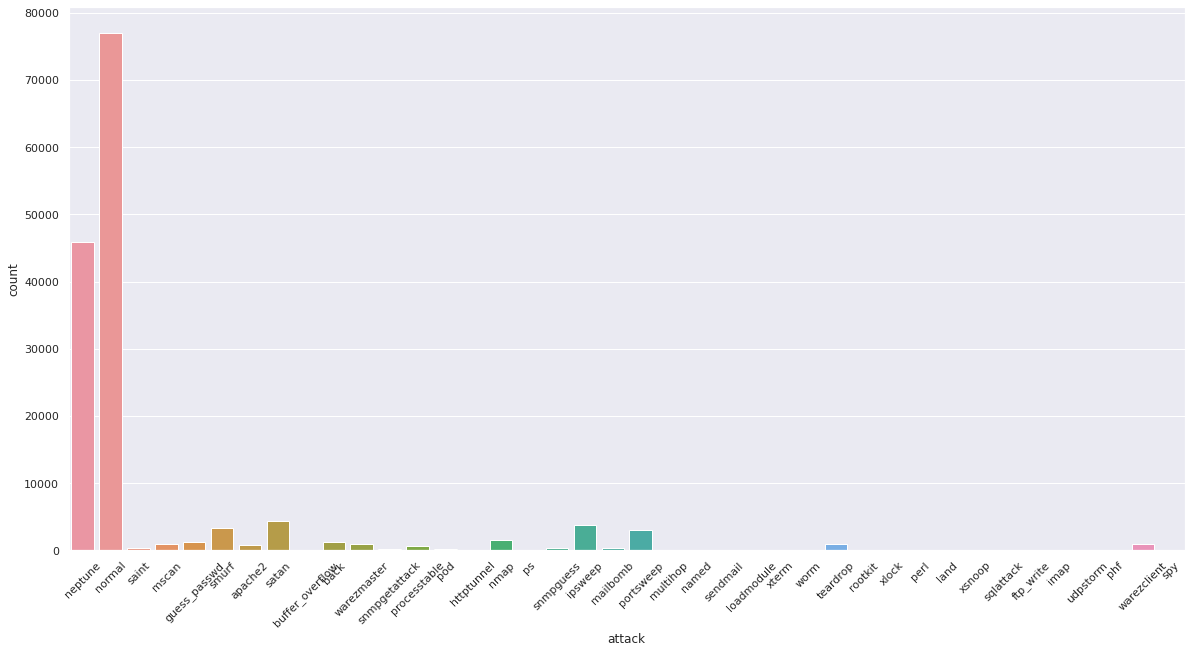

In [63]:
# Analyse de la colonne 'Attack'
plt.figure(figsize=(20,10))
sns.countplot(df['attack'])
plt.xticks(rotation = 45)
plt.show()

In [64]:
#Affichons les valeurs des attributs dans notre ensemble de données, telles que min, max, écart type
df.describe() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,148515.000000,1.485150e+05,1.485150e+05,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,...,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000
mean,276.783032,4.022849e+04,1.708908e+04,0.000215,0.020523,0.000202,0.189382,0.004323,0.402794,0.255065,...,119.464034,0.534526,0.084104,0.145933,0.030584,0.256125,0.251308,0.136215,0.136392,19.278463
std,2460.699490,5.409648e+06,3.703550e+06,0.014677,0.240071,0.019417,2.013173,0.072249,0.490462,22.231525,...,111.232434,0.448061,0.194103,0.308639,0.108976,0.428501,0.429721,0.322735,0.335277,2.739772
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [119]:
#les informations du jeux de données test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

In [120]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

*Il y a  4 variables catégorielles dans le jeux de données et aucune valeurs nulles.*

,Missing Records,Percentage (%)
duration,0,0.0
protocol_type,0,0.0
service,0,0.0
flag,0,0.0
src_bytes,0,0.0
dst_bytes,0,0.0
land,0,0.0
wrong_fragment,0,0.0
urgent,0,0.0
hot,0,0.0


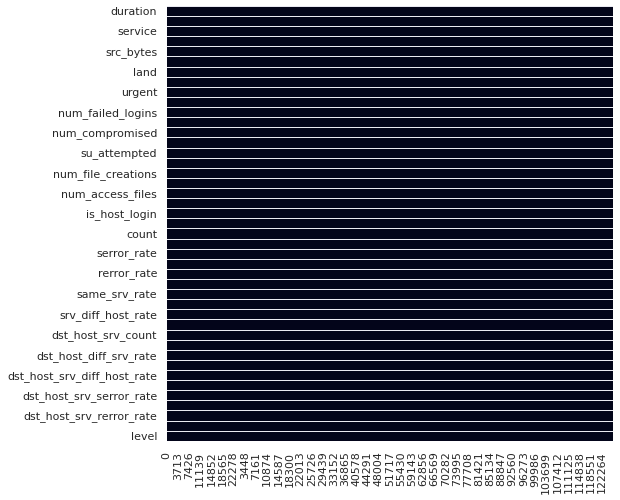

In [121]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.isnull(df.T), linecolor='blue', cbar=False)

pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

In [68]:
def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(15,25)) 
    
    for n, col in enumerate(df[cols]):         
        ax = plt.subplot(grid[n]) 
        ax.hist(df[col], bins=20) 
        ax.set_title(f'{col} distribution', fontsize=15) 
    
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

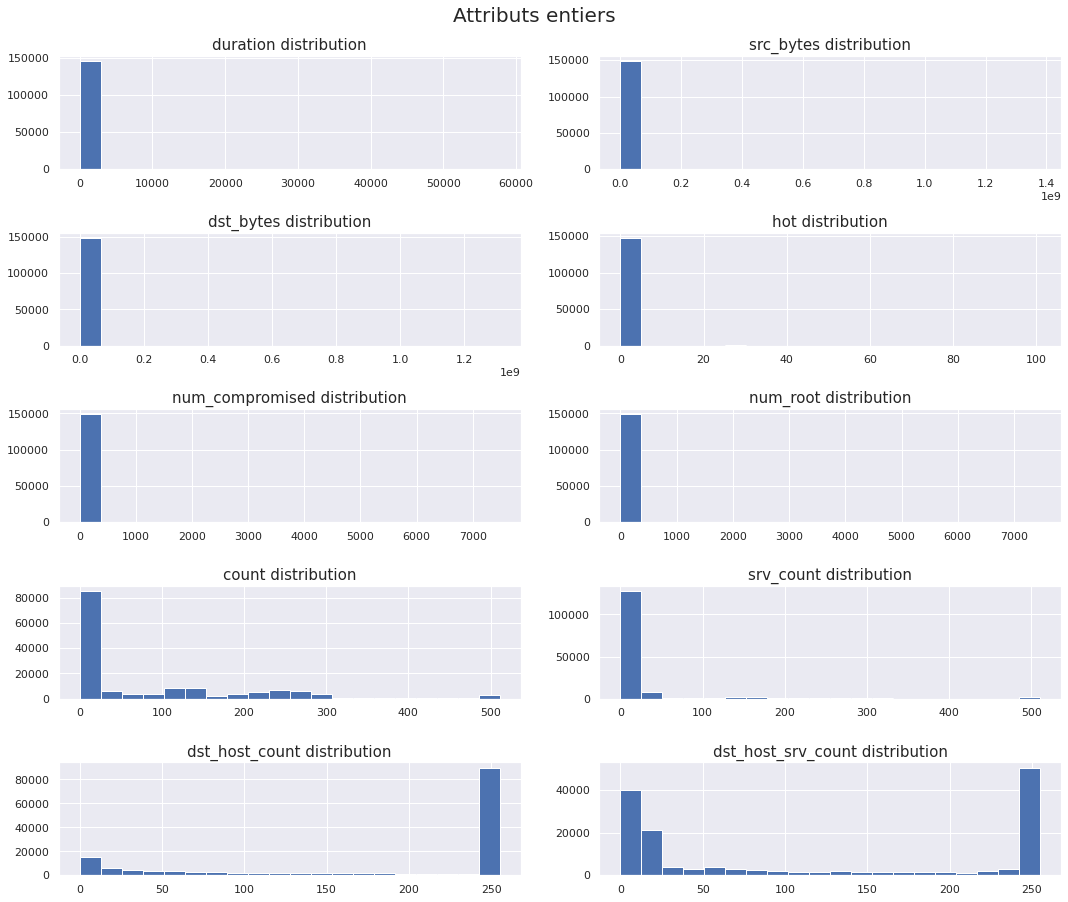

In [69]:
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
plot_hist(df, hist_cols, 'Attributs entiers')

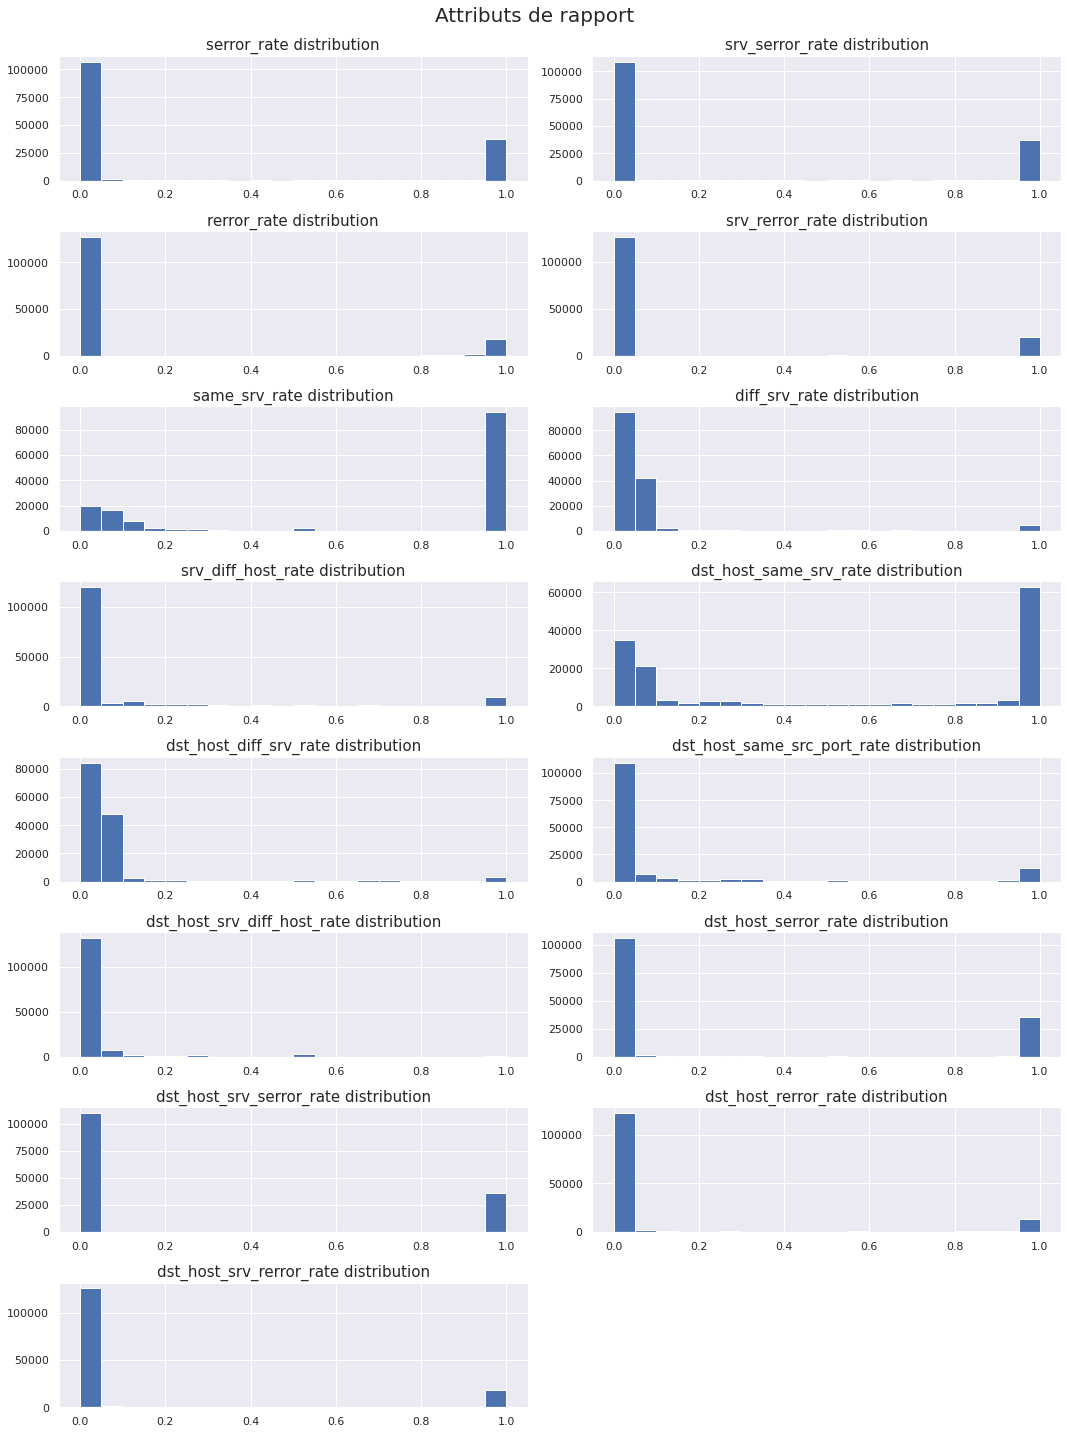

In [70]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
plot_hist(df, rate_cols, 'Attributs de rapport')

*J'ai visualisé les distributions des entités dans le jeu de données.*

In [122]:
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
df['attack_state'] = is_attack
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0


*Exploration de la  colonne d'attaque catégorique numériquement en créant la colonne attak_state, où j'afficherais les états d'attaque comme 1 et les états de non-attaque comme 0.*

*Ainsi, il sera possible de  voir combien de données d'attaque nous avons et combien de données normales il y a.*

In [123]:
(df.attack_state == 1).sum()/len(df)

0.4811769854896812

*Il y a  environ 46 % d'attaques dans le jeu de données.*

In [124]:
# Je définie les nombres de situation d'attaques et ceux sans attaques 
nbre_attack = (df.attack_state == 1).sum()
nbre_sans_attack= (df.attack_state == 0).sum()
myData = [nbre_attack , nbre_sans_attack]

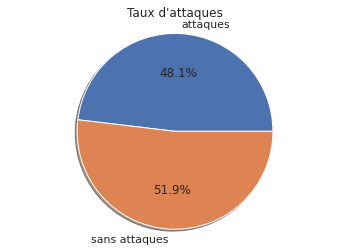

In [125]:
my_labels = 'attaques','sans attaques'
plt.pie(myData,labels = my_labels, autopct='%1.1f%%', shadow = True)
plt.title("Taux d'attaques")
plt.axis('equal')
plt.show()

In [126]:
# Définir les différentes attaques DDoS/DoS 
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']

In [127]:
def class_attack(attack):
  if attack in DoS_attacks:
    attack_type = 1
  else : 
    attack_type = 0
  return attack_type  

*Création de la colonne 'attack_class' que j'ajoute dans le jeux de données.*

*Sous cette colonne se trouve les équivalents numériques des classes de nos attaques.*

In [128]:
attack_class = df.attack.apply(class_attack)
df['attack_class'] = attack_class

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1,0
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1,0
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0,0


*Exploration du nouvel ensemble de données*

In [129]:
Normal = (df.attack_class == 0).sum()/len(df)
print('Normal = ' , Normal)
DoSDDoS = (df.attack_class == 1).sum()/len(df)
print('DoS/DDoS = ' , DoSDDoS)

Normal =  0.6405346261320405
DoS/DDoS =  0.35946537386795946


In [79]:
# Observation de la répartition des types d'attaques au sein de la  classe d'attaque.
attack_vs_DDoS = pd.crosstab(df.attack_class == 1, df.attack)
attack_vs_DDoS

attack,apache2,back,buffer_overflow,ftp_write,guess_passwd,httptunnel,imap,ipsweep,land,loadmodule,...,spy,sqlattack,teardrop,udpstorm,warezclient,warezmaster,worm,xlock,xsnoop,xterm
attack_class,,,,,,,,,,,,,,,,,,,,,
False,0,0,50,11,1284,133,12,3740,0,11,...,2,2,0,0,890,964,0,9,4,13
True,737,1315,0,0,0,0,0,0,25,0,...,0,0,904,2,0,0,2,0,0,0


In [130]:
#Visualisons les distributions.

def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # Configuration pour mapper les couleurs
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # Construction des subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # Parcourir les ensembles de données et créer les graphiques
    for count, data_set in enumerate(data_list): 
        
        # Mise à jour notre palette de couleurs avec de nouvelles valeurs
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # Construction des wedges
        wedges,texts = axs[count].pie(data_set,  shadow = True, #autopct='%1.1f%%'
                           colors=[cdict[v] for v in data_set.index])

        # Mise en place de la légende
        axs[count].legend(wedges, data_set.index,
                           title="Situation",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # Définission du titre
        axs[count].set_title(labels[count])
        
    return axs 
 

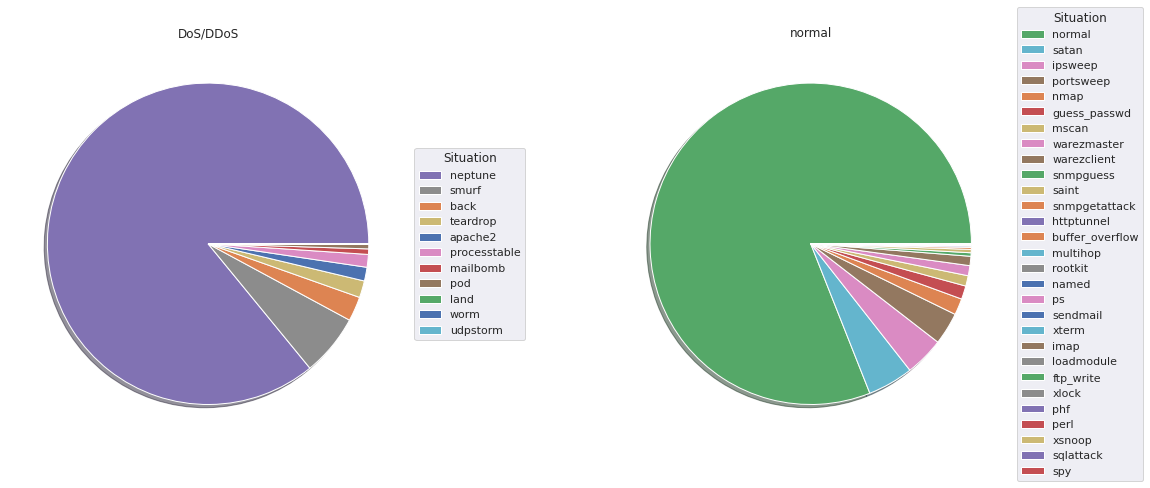

In [131]:
normal_class = df.loc[df.attack_class == 0].attack.value_counts()
DoSDDoS_class = df.loc[df.attack_class == 1].attack.value_counts()

lag_axs = bake_pies([DoSDDoS_class , normal_class], ['DoS/DDoS','normal'])        
plt.show()

*Il y a 16 types d'attaques différentes dans la classe  attaque normale.* 

*Je constate que dans le graphique ciculaires il y a 6 attaques dans l'ensemble des données que je vais utiliser*

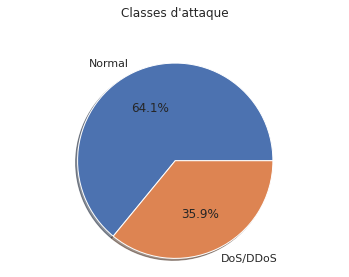

In [132]:
# Répartition de la classes d'attaque en général
Normal = (df.attack_class == 0).sum()
DoSDDoS = (df.attack_class == 1).sum()

myData = [Normal , DoSDDoS]

my_labels = 'Normal','DoS/DDoS' 
plt.pie(myData,labels=my_labels ,autopct='%1.1f%%' , shadow = True)
plt.title("Classes d'attaque\n\n")
plt.axis('equal')
plt.show()

*Comme montre le graphique circulaire, les attaques DoS/DDoS ont un taux de 35.9% dans le jeux de données.*

In [133]:
# Choix de la comme variable cible 'attack_class = 1' c'est-à-dire les attaques DoS/DDoS.
attack_vs_protocol = pd.crosstab((df.attack_class == 1), df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack_class,,,
False,5781,72640,16708
True,3553,48927,906


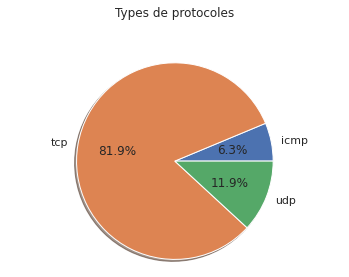

In [134]:
icmp = attack_vs_protocol.icmp.sum()
tcp = attack_vs_protocol.tcp.sum()
udp = attack_vs_protocol.udp.sum()
myData = [icmp , tcp,udp]
my_labels = 'icmp','tcp' ,'udp' 
plt.pie(myData,labels=my_labels ,autopct='%1.1f%%' , shadow = True)
plt.title('Types de protocoles\n\n')
plt.axis('equal')
plt.show()

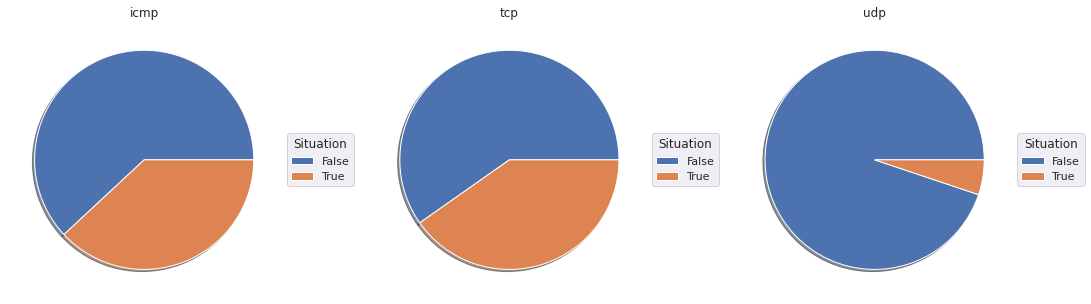

In [135]:
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

Dans les graphiques et tableaux ci-dessus, nous voyons la répartition des types de protocoles dans les attaques DDoS des données.

Il existe plusieurs types d'attaques DDoS.

1.   Attaque DDoS basée sur le volume : par manipulation des paquets UDP et SYN
2.   Attaque DDoS basée sur le protocole : avec des vulnérabilités sur les paquets TCP/IP et UDP
3.   Attaque DDoS par inondation

*   *Attaque DDoS Ping Flood : via le protocole ICMP*
*   *Attaque DDoS SYN Flood : avec manipulation TCP/IP*
*   *UDP Flood se présente sous la forme d'une attaque DDoS*







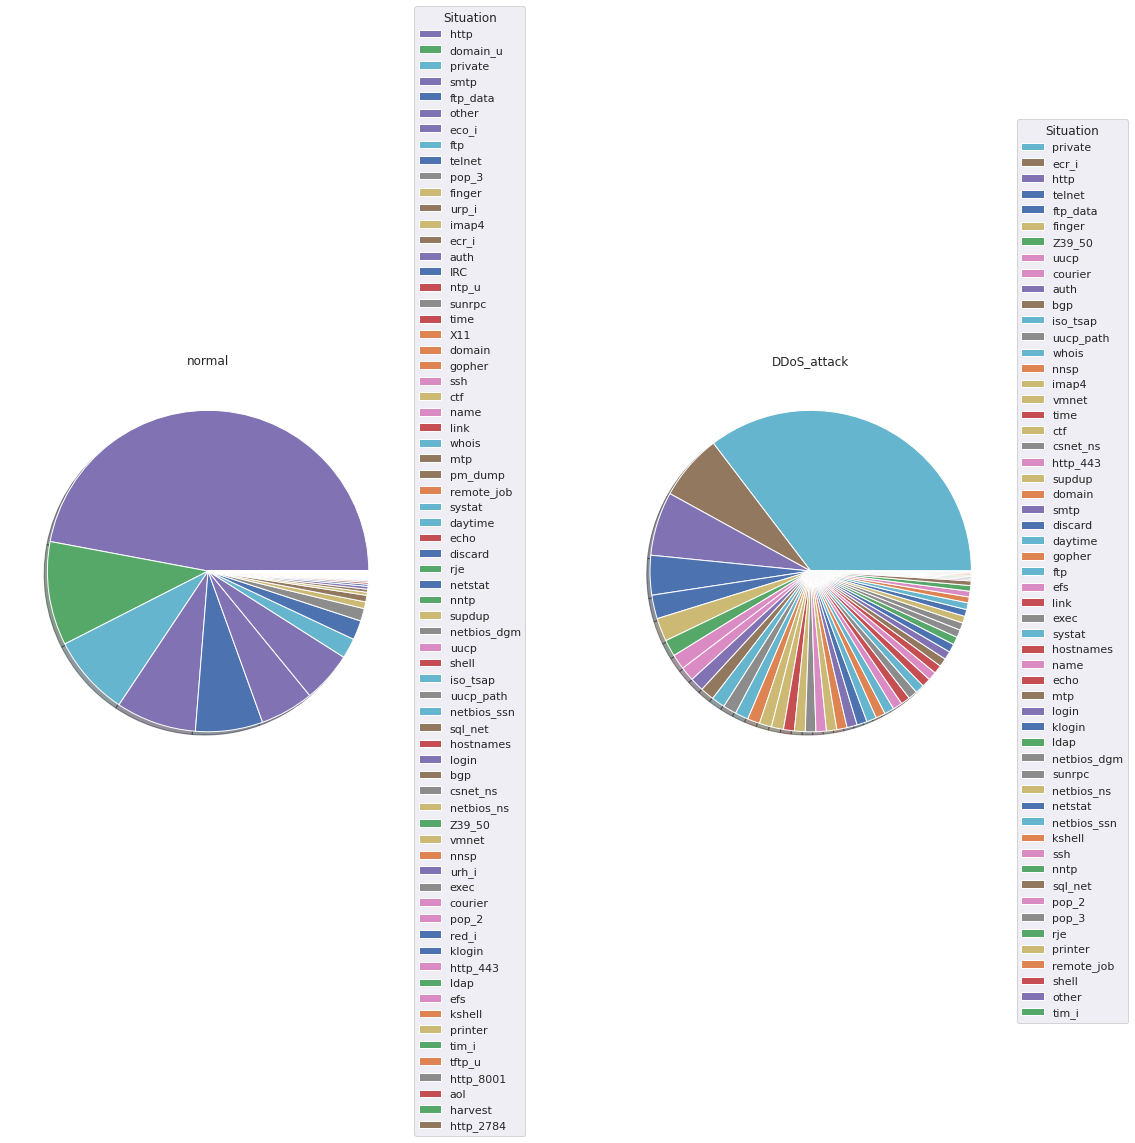

In [136]:
normal_services = df.loc[df.attack_class == 0].service.value_counts()
DDoS_attack_services = df.loc[df.attack_class == 1].service.value_counts()

service_axs = bake_pies([normal_services, DDoS_attack_services], ['normal','DDoS_attack'])        
plt.show()

In [137]:
service_vs_protocol = pd.crosstab(df.service, df.protocol_type,)
service_vs_protocol

protocol_type,icmp,tcp,udp
service,,,
IRC,0,200,0
X11,0,88,0
Z39_50,0,907,0
aol,0,2,0
auth,0,1022,0
...,...,...,...
urp_i,625,0,0
uucp,0,830,0
uucp_path,0,735,0


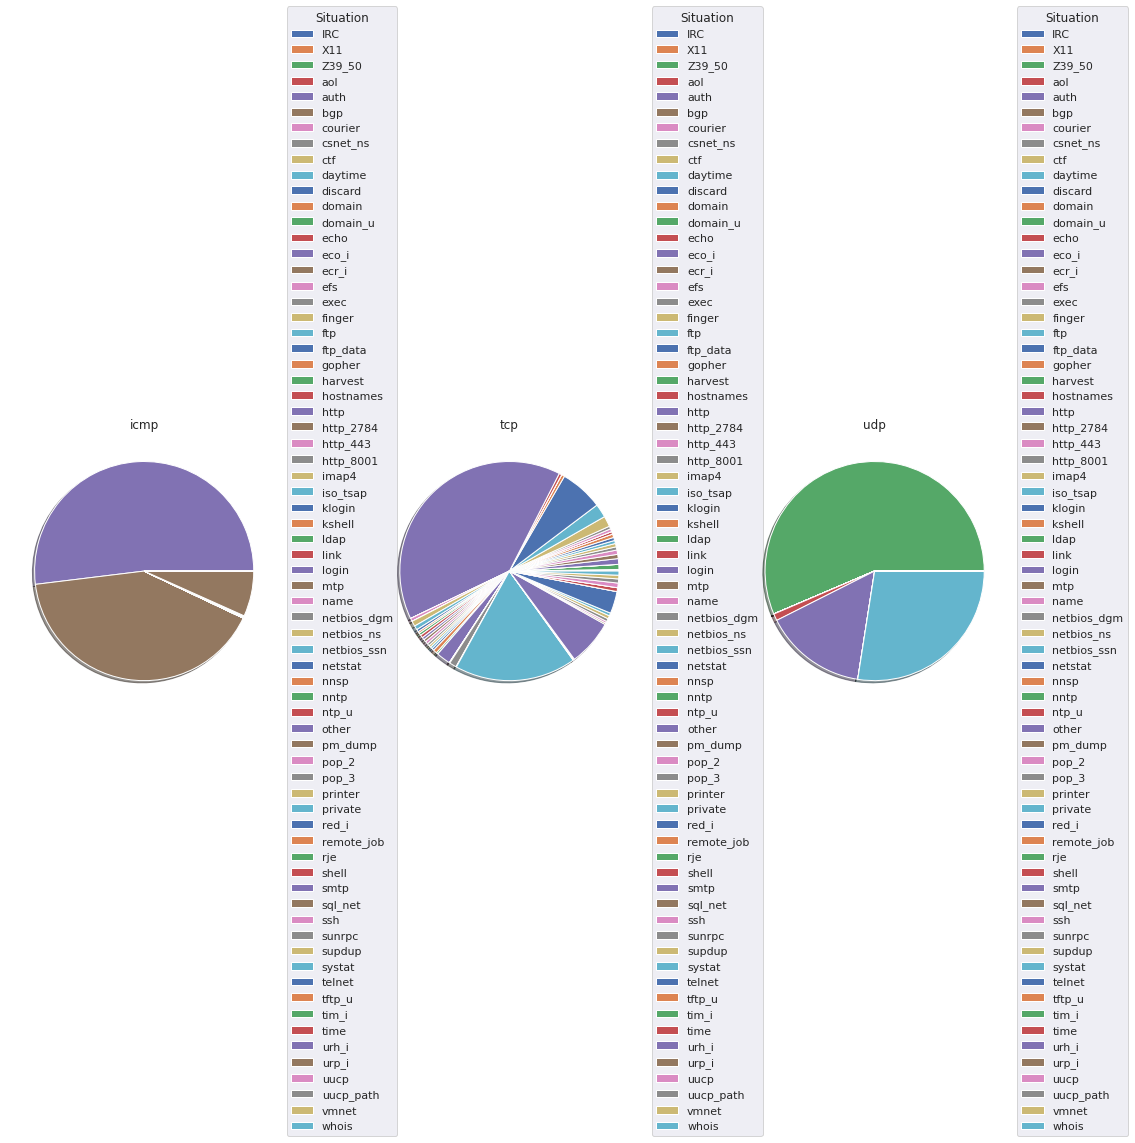

In [138]:
icmp_service = service_vs_protocol.icmp
tcp_service = service_vs_protocol.tcp
udp_service = service_vs_protocol.udp

# Création des graphiques
bake_pies([icmp_service, tcp_service, udp_service],['icmp','tcp','udp'])
plt.show()

Analyse bivariée (varirable catégorielle)

In [139]:
df.groupby('attack_class').count()[['protocol_type', 'service','flag']]

,protocol_type,service,flag
attack_class,,,
0,95129,95129,95129
1,53386,53386,53386


# 3 Encodage des données

In [140]:
# Effacer les données des variables catégorielles à l'aide de dl'encodeur d'étiquette.
df = pd.get_dummies(df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [141]:
# Les valeurs catégorielles ont bien été effacé pas des valeurs enières.
df.head() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [144]:
# Suppression des colonnes qui contiennent des variables catégorielles
drop_cols = ['attack' ]  
df.drop(drop_cols, axis=1, inplace=True)  

In [145]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 125971
Columns: 125 entries, duration to SH
dtypes: float64(15), int64(26), uint8(84)
memory usage: 63.5 MB


# 4 Sélection des features

In [146]:
normal = df[df.attack_class == 0]
DDoS = df[df.attack_class == 1]
total_data = pd.concat([normal, DDoS], ignore_index=True)
total_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1022,387,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
148511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
148512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
148513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [147]:
corr= total_data.corr()
corr_y = abs(corr['attack_class'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

Z39_50                         0.102657
wrong_fragment                 0.106752
dst_host_srv_rerror_rate       0.131760
srv_rerror_rate                0.136632
eco_i                          0.137613
other                          0.137614
rerror_rate                    0.137797
REJ                            0.139810
smtp                           0.148007
dst_host_rerror_rate           0.160192
tcp                            0.190351
ecr_i                          0.192011
dst_host_srv_diff_host_rate    0.198026
domain_u                       0.200603
dst_host_same_src_port_rate    0.221066
udp                            0.235477
srv_diff_host_rate             0.263980
private                        0.340389
http                           0.416400
dst_host_count                 0.467546
logged_in                      0.555090
dst_host_srv_count             0.571309
count                          0.579726
dst_host_same_srv_rate         0.636275
srv_serror_rate                0.734814


In [148]:
highest_corr_columns= highest_corr.index

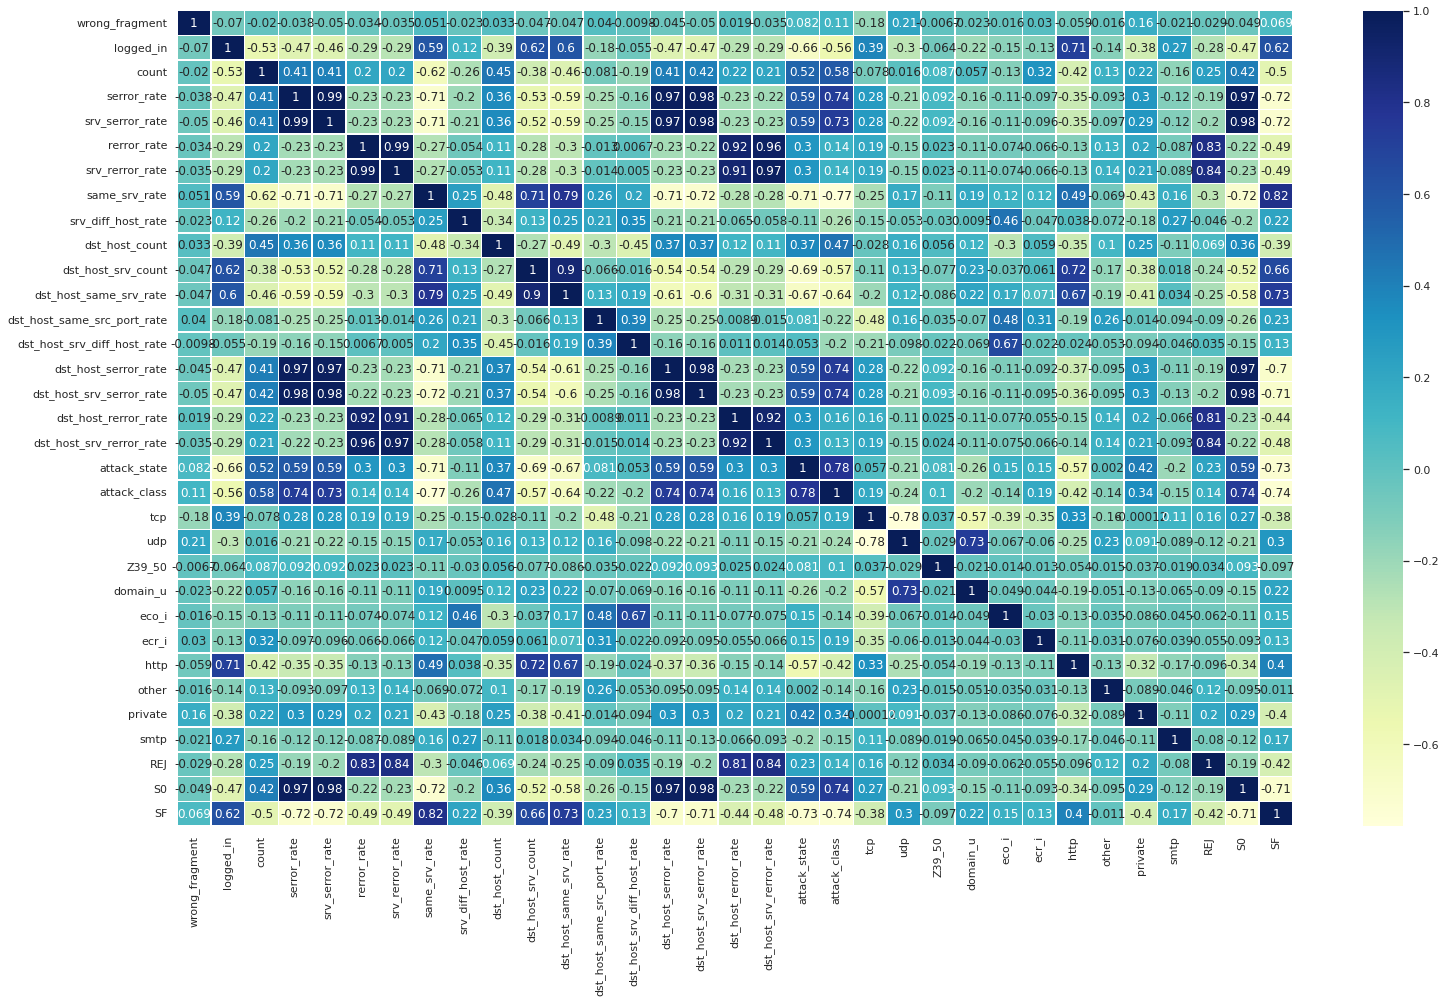

In [149]:
plt.figure(figsize=(25,15))
g=sns.heatmap(total_data[highest_corr.index].corr(),annot=True,cmap="YlGnBu",linewidths=.5)

*J'affiche les attributs les plus associés aux attaques DDoS dans la matrice de corrélation et la carte thermique.*

*J'entraîne l'ensemble de données en supprimants les attributs autres que ces attributs.*


In [150]:
cols = df.loc[:,[i for i in list(df.columns) if i not in [
'diff_srv_rate',  
'protocol_type',
'service',
'flag',              
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                  
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'                          
]]]

In [151]:
df.drop(drop_cols, axis=1, inplace=True)  
df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.06,0.00,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0.0,0.12,1.0,0.5,1.00,0.00,0.75,...,0,0,0,0,0,0,0,1,0,0
4,0,1,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,184,1.0,1.00,0.0,0.0,0.14,0.06,0.00,...,0,0,0,1,0,0,0,0,1,0
125968,0,0,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,1
125969,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
125970,0,0,144,1.0,1.00,0.0,0.0,0.06,0.05,0.00,...,0,0,0,0,0,0,0,0,1,0


In [156]:
drop = df.drop('attack_class'  , axis = 1)

In [199]:
X= df.drop('attack_class'  , axis = 1)
y = df['attack_class']

In [202]:
y

0         1
1         0
2         0
3         0
4         0
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: attack_class, Length: 148515, dtype: int64

In [200]:
X

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.06,0.00,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0.0,0.12,1.0,0.5,1.00,0.00,0.75,...,0,0,0,0,0,0,0,1,0,0
4,0,1,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,184,1.0,1.00,0.0,0.0,0.14,0.06,0.00,...,0,0,0,1,0,0,0,0,1,0
125968,0,0,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,1
125969,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
125970,0,0,144,1.0,1.00,0.0,0.0,0.06,0.05,0.00,...,0,0,0,0,0,0,0,0,1,0


# Classification avec la normalisation des données

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

In [215]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train) 
X_test= mms.transform(X_test)

*Mise à l'échelle et normalisons des données.*

## 1 DECISION TREE


In [216]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

Accuracy: 0.9992728056236365


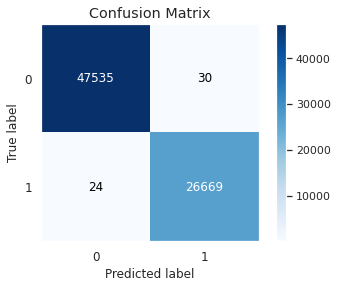

In [223]:
splt.plot_confusion_matrix(y_test, dt_pred)

In [224]:
# La valeur de 1 donne ici attack_class == 1, c'est-à-dire des attaques DDoS.
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47565
           1       1.00      1.00      1.00     26693

    accuracy                           1.00     74258
   macro avg       1.00      1.00      1.00     74258
weighted avg       1.00      1.00      1.00     74258



## 2 NAIVE BAYES

In [225]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,gnb_pred))

Accuracy :  0.9701042311939454


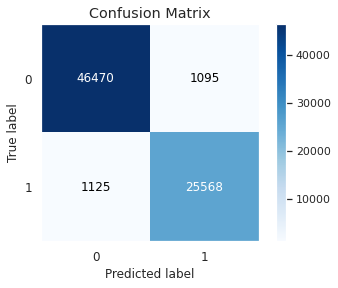

In [226]:
splt.plot_confusion_matrix(y_test, gnb_pred)

In [227]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     47565
           1       0.96      0.96      0.96     26693

    accuracy                           0.97     74258
   macro avg       0.97      0.97      0.97     74258
weighted avg       0.97      0.97      0.97     74258



## 3 K-Nearest Neighbors

In [228]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn = knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.9992728056236365


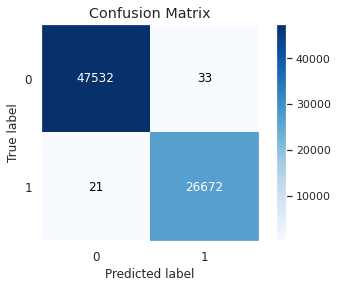

In [229]:
splt.plot_confusion_matrix(y_test, knn_pred)